<a href="https://colab.research.google.com/github/RiccardoRubini93/housekeeping/blob/main/Lettura_riscaldamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [10]:
from google.colab import auth
auth.authenticate_user()

In [11]:
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('Lettura riscaldamento').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)


[['Timestamp', 'Date', 'Id 217', 'Id 219', 'Id 144', 'Id 146'], ['1/4/2024 0:00:00', '1/4/2024', '308', '52', '33', '225']]


In [60]:
mapping_dict = {'Id 217': 'Stanza',
                  'Id 219': 'Bagno',
                  'Id 144': 'Cucina',
                   'Id 146': 'Studio'}

In [62]:
# Convert to a DataFrame and render.
import pandas as pd

columns = rows[0]
data    = rows[1:]

df = pd.DataFrame(data, columns=columns)
df_mapped = df.rename(columns=mapping_dict)
df_mapped

,Timestamp,Date,Stanza,Bagno,Cucina,Studio
0,1/4/2024 0:00:00,1/4/2024,308,52,33,225


In [21]:
df.head()

,Timestamp,Date,Id 217,Id 219,Id 144,Id 146
0,1/4/2024 0:00:00,1/4/2024,308,52,33,225


In [22]:
total_consumption = df[df.columns[-4:]].apply(pd.to_numeric).sum()

In [24]:
total_consumption.sum()

618

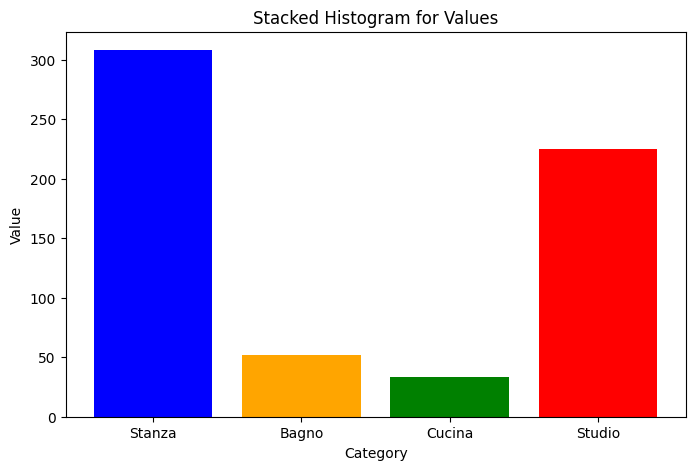

In [65]:
#plotting
import matplotlib.pyplot as plt

# Categories (for example, 'Id 217', 'Id 219', 'Id 144', 'Id 146')
categories = ['Stanza','Bagno','Cucina','Studio']

# Values for the stacked histogram
values = df_mapped[categories].iloc[0].apply(pd.to_numeric).to_list()

# Plot a stacked histogram
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange', 'green', 'red'])

plt.title('Stacked Histogram for Values')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

In [66]:
values

[308, 52, 33, 225]

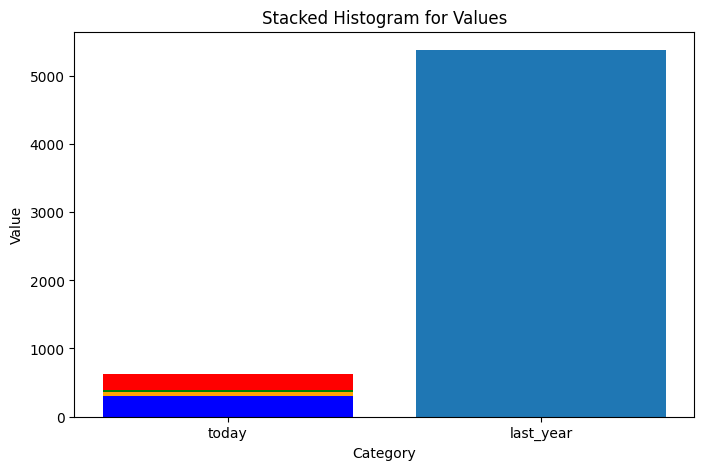

In [59]:
last_year_reading = 5380

# Plot a stacked histogram
plt.figure(figsize=(8, 5))
plt.bar('today', values[0],bottom = 0,color= 'blue')
plt.bar('today', values[1],bottom= values[0], color='orange')
plt.bar('today', values[2],bottom= values[1]+values[0], color='green')
plt.bar('today', values[3],bottom= values[2]+values[1]+values[0], color='red')

plt.bar('last_year',last_year_reading,bottom = 0)

plt.title('Stacked Histogram for Values')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

5380